In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [164]:
df1 = pd.read_csv("./Open Data/National_Drugs_Strategy_Household_Survey__NDSHS__-_Tobacco.csv", encoding="utf-8")

In [46]:
df1.columns

Index(['Year', 'Region', 'Category', 'Indicator', 'Characteristic', 'Age',
       'Sex', 'Result', 'Unit', 'Significants (g)', 'Comments'],
      dtype='object')

In [65]:
df1.dtypes

Year                int64
Region             object
Characteristic     object
Age                object
Sex                object
Result            float64
dtype: object

In [91]:
df1.describe()

count    909.000000
mean      16.742904
std       15.343531
min        0.000000
25%        6.400000
50%       14.500000
75%       21.000000
max       68.500000
Name: Result, dtype: float64

In [134]:
np.unique(df1['Characteristic'])

array(['Daily', 'Ex-smoker', 'Less than weekly', 'Weekly'], dtype=object)

In [165]:
df1.dropna(subset = ["Result"], inplace=True)
df1 = df1.loc[df1['Characteristic'] != 'Never smoked']
df1 = df1.loc[df1['Characteristic'] != 'Ex-smoker'] 

In [166]:
df1 = df1[['Year', 'Region', 'Characteristic', 'Age', 'Sex', 'Result']]

In [141]:
df1 = df1.groupby(['Year', 'Region', 'Characteristic', 'Age', 'Sex'], as_index = False)['Result'].agg(sum)

In [107]:
df1.head()

,Year,Region,Characteristic,Age,Sex,Result
0,1998,NSW,Daily,18+,Persons,21.8
1,1998,VIC,Daily,18+,Persons,22.9
2,1998,Qld,Daily,18+,Persons,24.3
3,1998,WA,Daily,18+,Persons,23.6
4,1998,SA,Daily,18+,Persons,19.4


In [167]:
df1.to_csv('smoking_propotion.csv', index = False)

In [161]:
df1_test = df1.loc[df1['Region'] == "ACT"]
df1_test = df1_test.loc[df1_test['Characteristic'] == "Daily"]
df1_test = df1_test.loc[df1_test['Age'] == "14+"]
df1_test = df1_test.loc[df1_test['Sex'] == "Persons"]

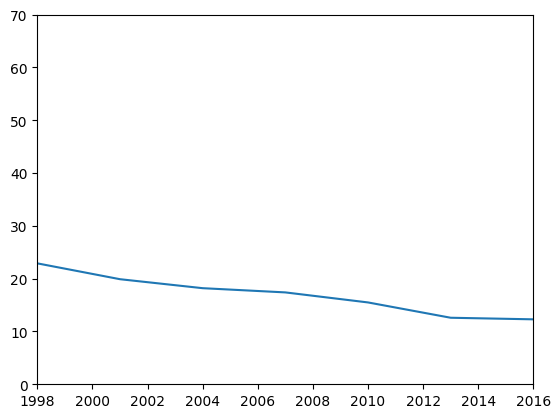

In [163]:
x = df1_vic["Year"]
y = df1_vic["Result"]
plt.plot(x, y)
axes = plt.gca()
axes.set_xlim([1998, 2016])
axes.set_ylim([0, 70])
plt.show()